In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
#from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [9]:
data=pd.read_csv(r'C:\Users\tanuj\Downloads\terror.csv',encoding='ISO-8859-1')

In [10]:
data.head()


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


Clearly there are lot of missing values

In [11]:
data.shape

(181691, 135)

In [12]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [ ]:
# there are many columns hence I will use only some for analysis

In [14]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country':'country1','country_txt':'Country','region':'Region1','region_txt':'Region','attacktype1':'attacktype1','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [15]:
terror=data[['Year','Month','Day','Country','country1','Region','Region1', 'city','AttackType','attacktype1','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
terror

,Year,Month,Day,Country,country1,Region,Region1,city,AttackType,attacktype1,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,58,Central America & Caribbean,2,Santo Domingo,Assassination,1,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,130,North America,1,Mexico city,Hostage Taking (Kidnapping),6,0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,160,Southeast Asia,5,Unknown,Assassination,1,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,78,Western Europe,8,Athens,Bombing/Explosion,3,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,101,East Asia,4,Fukouka,Facility/Infrastructure Attack,7,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,182,Sub-Saharan Africa,11,Ceelka Geelow,Armed Assault,2,1.0,2.0,Checkpoint,12/31/2017: Assailants opened fire on a Somali...,Al-Shabaab,Military,Firearms,NaN
181687,2017,12,31,Syria,200,Middle East & North Africa,10,Jableh,Bombing/Explosion,3,2.0,7.0,Hmeymim Air Base,12/31/2017: Assailants launched mortars at the...,Muslim extremists,Military,Explosives,NaN
181688,2017,12,31,Philippines,160,Southeast Asia,5,Kubentog,Facility/Infrastructure Attack,7,0.0,0.0,Houses,12/31/2017: Assailants set fire to houses in K...,Bangsamoro Islamic Freedom Movement (BIFM),Private Citizens & Property,Incendiary,NaN
181689,2017,12,31,India,92,South Asia,6,Imphal,Bombing/Explosion,3,0.0,0.0,Office,12/31/2017: Assailants threw a grenade at a Fo...,Unknown,Government (General),Explosives,NaN


In [16]:
terror['Day'].apply(np.floor)
terror['Month'].apply(np.floor)
terror['Killed'].apply(np.floor)
terror['Day'].apply(np.floor)

0          2.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
181686    31.0
181687    31.0
181688    31.0
181689    31.0
181690    31.0
Name: Day, Length: 181691, dtype: float64

In [17]:
#replacing dtypes with correct ones.
terror['attacktype1'] = pd.Categorical(terror.attacktype1)
terror['Region1'] = pd.Categorical(terror.Region1)
terror['country1'] = pd.Categorical(terror.country1)
terror['Country'] = pd.Categorical(terror.Country)
terror['Region'] = pd.Categorical(terror.Region)
terror['city'] = pd.Categorical(terror.city)
terror['AttackType'] = pd.Categorical(terror.AttackType)
terror['Group'] = pd.Categorical(terror.Group)
terror['Target_type'] = pd.Categorical(terror.Target_type)
terror['Weapon_type'] = pd.Categorical(terror.Weapon_type)

In [18]:
terror.describe() 
#descriptive statistics

,Year,Month,Day,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,2.403272,3.167668
std,13.259430,3.388303,8.814045,11.545741,35.949392
min,1970.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,2.000000,2.000000
max,2017.000000,12.000000,31.000000,1570.000000,8191.000000


In [19]:
terror.groupby(by='Month').agg(['count']) 
#as you can see there is 0 as a month hence we need to change it


,Year,Day,Country,country1,Region,Region1,city,AttackType,attacktype1,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count
Month,,,,,,,,,,,,,,,,,
0,20,20,20,20,20,20,20,20,20,9,9,19,0,20,20,20,0
1,14936,14936,14936,14936,14936,14936,14907,14936,14936,14014,13512,14838,9569,14936,14936,14936,4353
2,13879,13879,13879,13879,13879,13879,13855,13879,13879,13151,12658,13808,8797,13879,13879,13879,3705
3,15257,15257,15257,15257,15257,15257,15222,15257,15257,14189,13744,15154,9356,15257,15257,15257,3899
4,15152,15152,15152,15152,15152,15152,15122,15152,15152,14252,13737,15117,9814,15152,15152,15152,4478
5,16875,16875,16875,16875,16875,16875,16834,16875,16875,15819,15167,16800,10791,16875,16875,16875,4481
6,15359,15359,15359,15359,15359,15359,15314,15359,15359,14564,14017,15309,9902,15359,15359,15359,4370
7,16268,16268,16268,16268,16268,16268,16228,16268,16268,15397,14876,16238,10513,16268,16268,16268,4672


In [20]:
terror['Day'] = terror['Day'].apply(lambda x: np.random.randint(1,32) if x == 0 else x)
terror['Month'] = terror['Month'].apply(lambda x: np.random.randint(1,13) if x == 0 else x)


In [21]:
terror['date'] = pd.to_datetime(terror[['Year','Month', 'Day' ]], errors= 'coerce') #created a new column as merging year-month-day.
terror['date'] = pd.to_datetime(terror['date']) #double check
terror['day_of_week'] = terror['date'].dt.day_name()


# Missing values


In [22]:
terror.dropna(how="all",inplace=True)

In [25]:
terror.dropna(subset=["date"],inplace=True) #the point was the date in this data, to me. So I just delete that 23 rows.
terror['Motive'].fillna(value='nothing', inplace=True) #I did not want to miss any value. So I replaced them with a value that has the same type.
terror['Summary'].fillna(value='nothing', inplace=True)
terror['city'].fillna(value='Unknown', inplace=True)
terror['Target'].fillna(value='Unknown', inplace=True)
terror["Killed"].fillna(terror["Killed"].mean(), inplace=True)
terror["Wounded"].fillna(terror["Wounded"].mean(), inplace=True)

# Basic analysis

In [24]:
print('which country has the most terrorist attacks? :',terror['Country'].value_counts().index[0])
print('which region has the most terrorist attacks?:',terror['Region'].value_counts().index[0])
print('Maximum people killed in an attack are:',terror['Killed'].max(),'that took place in',terror.loc[terror['Killed'].idxmax()].Country)
print('How many people wounded in last 50 years due the Terrorist Attacks :',terror['Wounded'].sum())
print('How many people died in last 50 years due the Terrorist Attacks :',terror['Killed'].apply(np.floor).sum())

which country has the most terrorist attacks? : Iraq
which region has the most terrorist attacks?: Middle East & North Africa
Maximum people killed in an attack are: 1570.0 that took place in Iraq
How many people wounded in last 50 years due the Terrorist Attacks : 575525.3024521513
How many people died in last 50 years due the Terrorist Attacks : 432485.0


In [26]:
terror.head()

,Year,Month,Day,Country,country1,Region,Region1,city,AttackType,attacktype1,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,date,day_of_week
0,1970,7,2,Dominican Republic,58,Central America & Caribbean,2,Santo Domingo,Assassination,1,1.000000,0.000000,Julio Guzman,nothing,MANO-D,Private Citizens & Property,Unknown,nothing,1970-07-02,Thursday
1,1970,5,23,Mexico,130,North America,1,Mexico city,Hostage Taking (Kidnapping),6,0.000000,0.000000,"Nadine Chaval, daughter",nothing,23rd of September Communist League,Government (Diplomatic),Unknown,nothing,1970-05-23,Saturday
2,1970,1,7,Philippines,160,Southeast Asia,5,Unknown,Assassination,1,1.000000,0.000000,Employee,nothing,Unknown,Journalists & Media,Unknown,nothing,1970-01-07,Wednesday
3,1970,1,13,Greece,78,Western Europe,8,Athens,Bombing/Explosion,3,2.403453,3.167901,U.S. Embassy,nothing,Unknown,Government (Diplomatic),Explosives,nothing,1970-01-13,Tuesday
4,1970,1,14,Japan,101,East Asia,4,Fukouka,Facility/Infrastructure Attack,7,2.403453,3.167901,U.S. Consulate,nothing,Unknown,Government (Diplomatic),Incendiary,nothing,1970-01-14,Wednesday


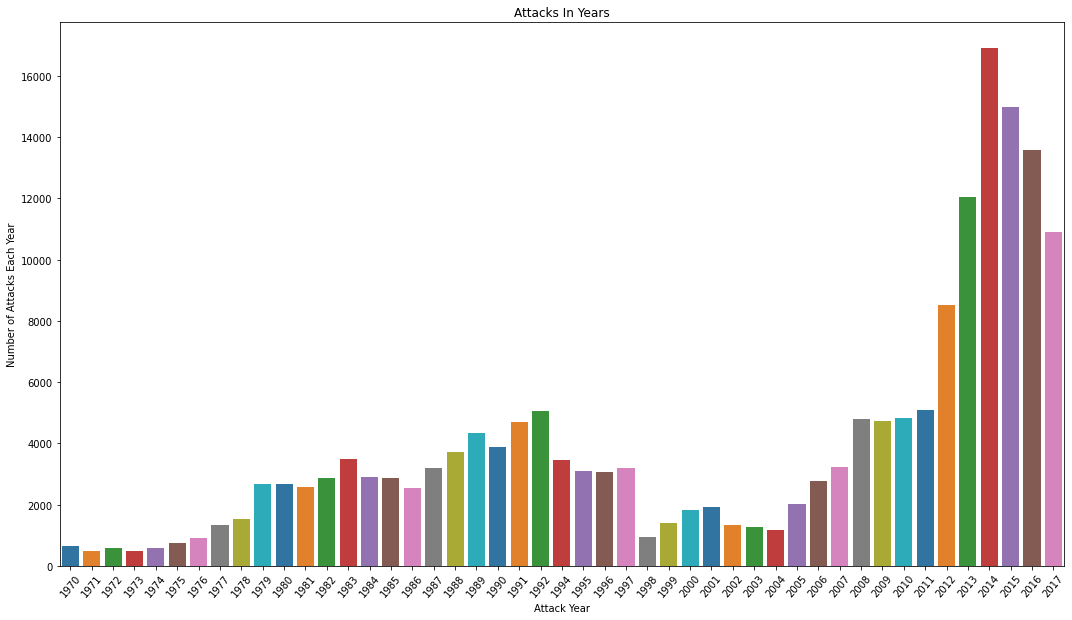

In [29]:
year = terror['Year'].unique()
years_count = terror['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = year,
           y = years_count,
           palette = "tab10")
plt.xticks(rotation = 50)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks Each Year')
plt.title('Attacks In Years')
plt.show()

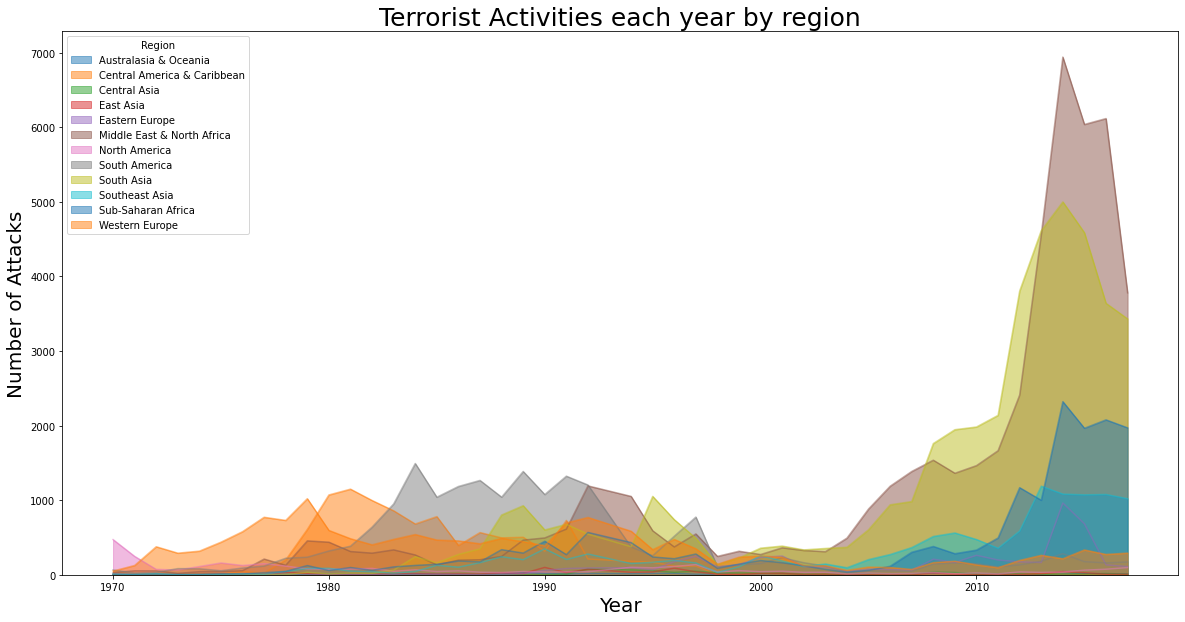

In [31]:
pd.crosstab(data.Year, terror.Region).plot(kind='area',stacked=False,figsize=(20,10))
plt.title('Terrorist Activities each year by region',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.show()

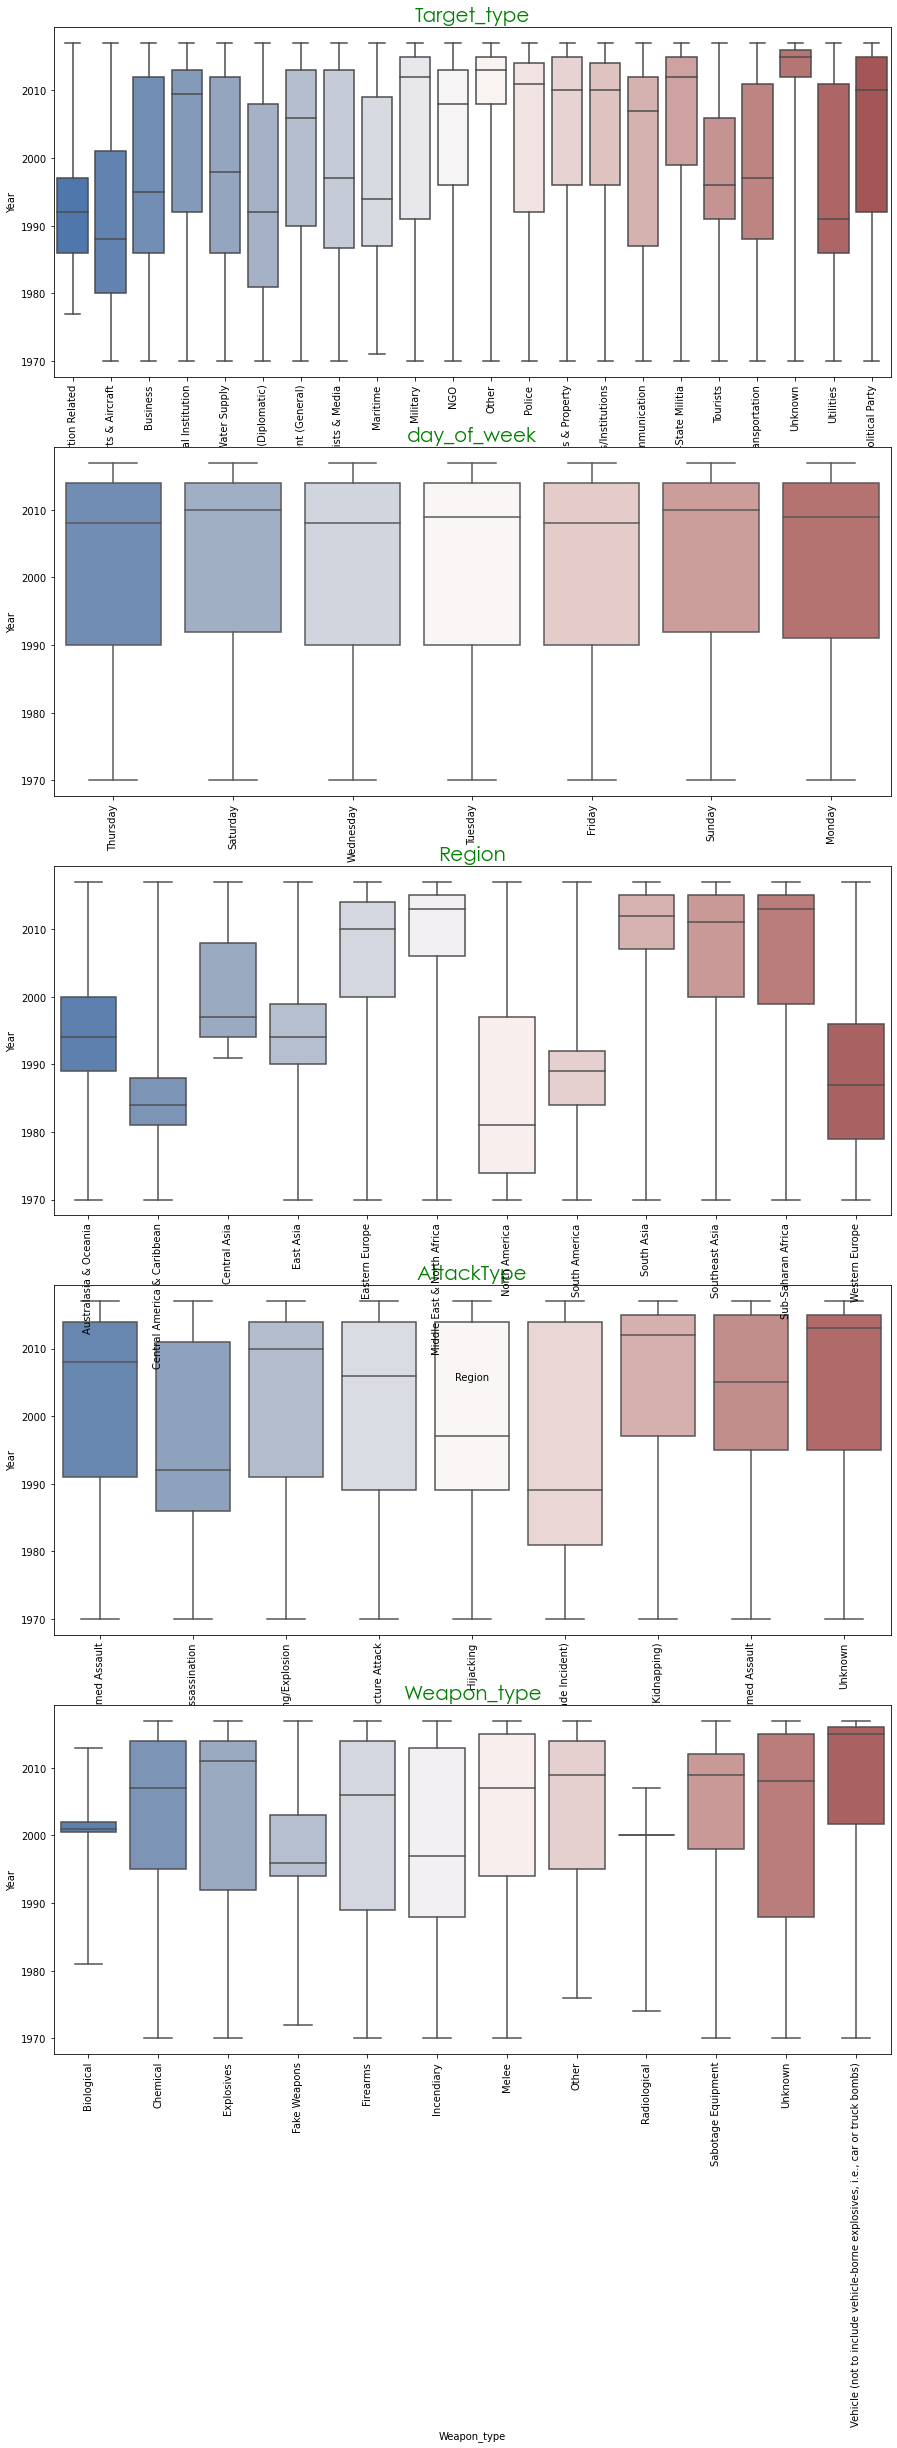

In [35]:
#boxplot

title_style = {'family': 'Century Gothic', 'color': 'green', 'size': 20 }
axis_style  = {'family': 'Century Gothic', 'color': 'darkblue', 'size': 25}
values = {'AttackType':1,'Target_type':2, 'day_of_week':3,   'Region':4,   'AttackType':5,   'Weapon_type':6 }
plt.figure(figsize=(15,45))

for value, i in values.items():
    plt.subplot(6,1,i)
    sns.boxplot(x=value, y="Year", data=terror,
            whis=[0, 100], palette="vlag")
    plt.xticks(rotation = 90)
    plt.title(value ,fontdict = title_style)

plt.show()

Text(0.5, 1.0, 'Correlation Matrix (Data)')

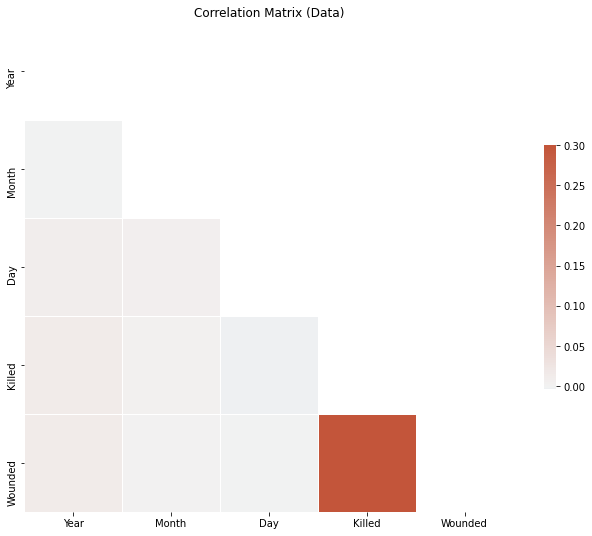

In [36]:
a = terror.corr()
mask = np.triu(np.ones_like(a, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(a, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation Matrix (Data)")

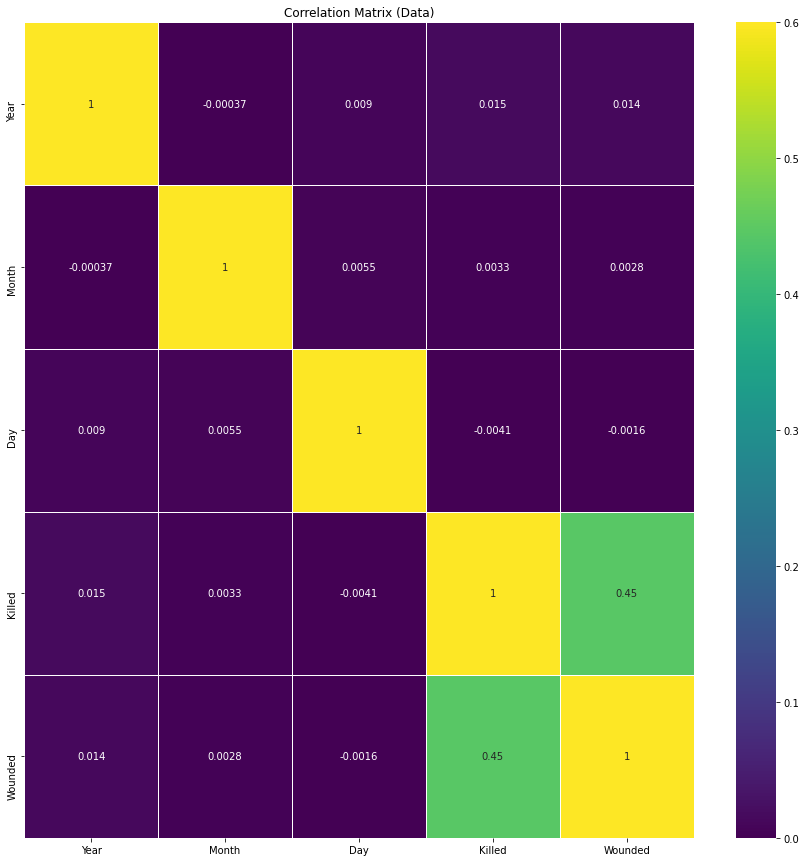

In [37]:
plt.figure(figsize=(15,15))
sns.heatmap(a, annot=True, annot_kws={"size": 10}, linewidths=1, vmin=0, vmax=0.6, cmap='viridis')
plt.title("Correlation Matrix (Data)")
plt.show() 
#let's make it clear.


#  Terror Attacks globally

In [38]:
#Does weapon type depend on regions?
weapon_cross = pd.crosstab(terror["Weapon_type"], terror["Region"])
weapon_cross

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Weapon_type,,,,,,,,,,,,
Biological,0,0,0,2,0,1,24,1,2,0,3,2
Chemical,11,2,2,17,12,73,26,26,83,11,12,46
Explosives,80,3148,254,333,3089,32282,1557,9098,22566,5039,6319,8654
Fake Weapons,0,0,1,4,4,6,5,3,3,0,1,6
Firearms,74,5679,232,41,1461,11876,682,6525,15169,5634,7497,3651
Incendiary,74,434,15,252,186,1181,897,1077,2285,837,840,3055
Melee,10,65,14,82,90,1227,74,131,998,147,478,339
Other,1,0,0,3,4,23,18,6,16,4,19,20
Radiological,0,0,0,10,0,0,1,0,1,0,0,2


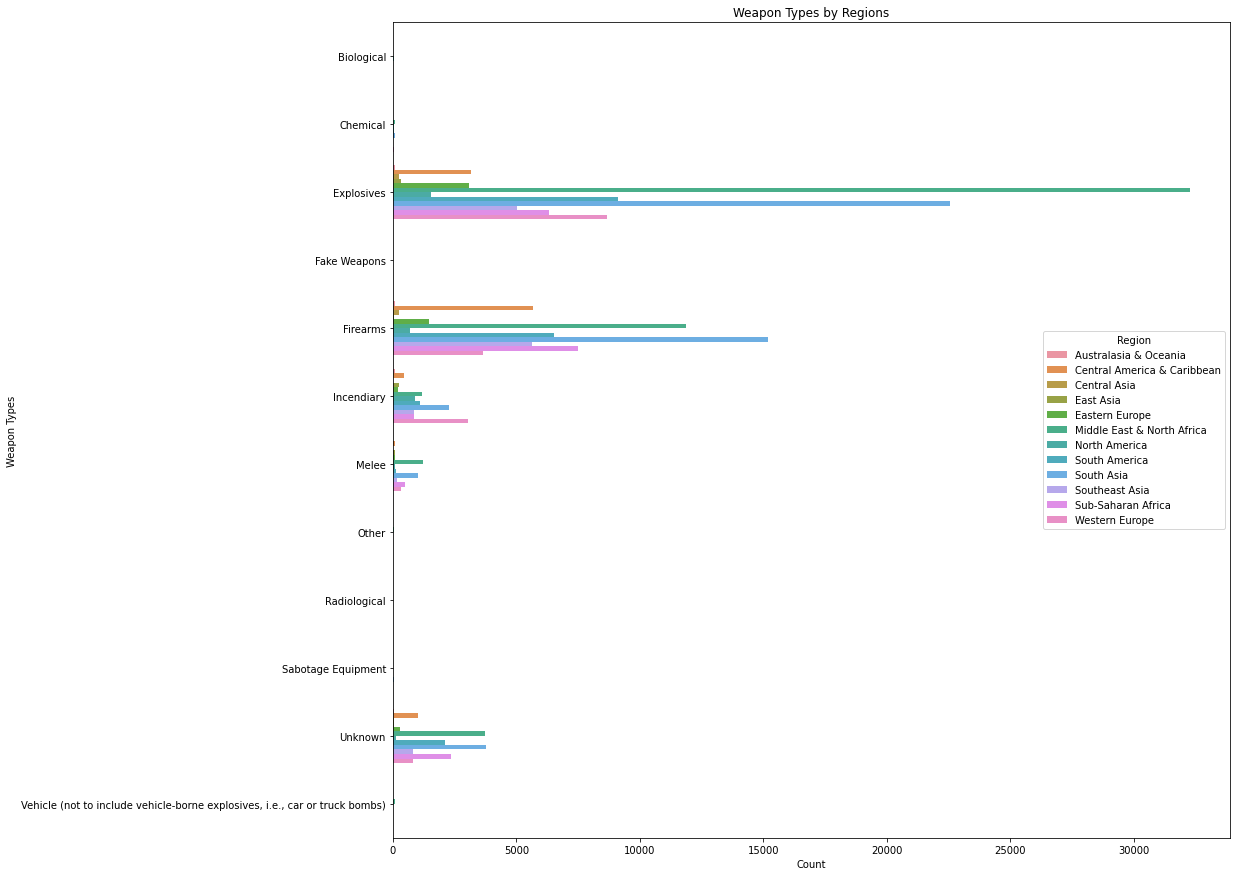

In [39]:
plt.figure(figsize=(15,15))
sns.countplot(y="Weapon_type", hue="Region", data=terror)
plt.title("Weapon Types by Regions")
plt.ylabel("Weapon Types")
plt.xlabel("Count")
plt.show()

In [40]:
#How many people loose their lives every year
terror['date'] = pd.to_datetime(terror['date'])
k_by_year = terror.groupby('date')['Killed'].sum().reset_index()
terror['date'] = pd.to_datetime(terror['date'])
k_by_year = k_by_year.set_index('date')

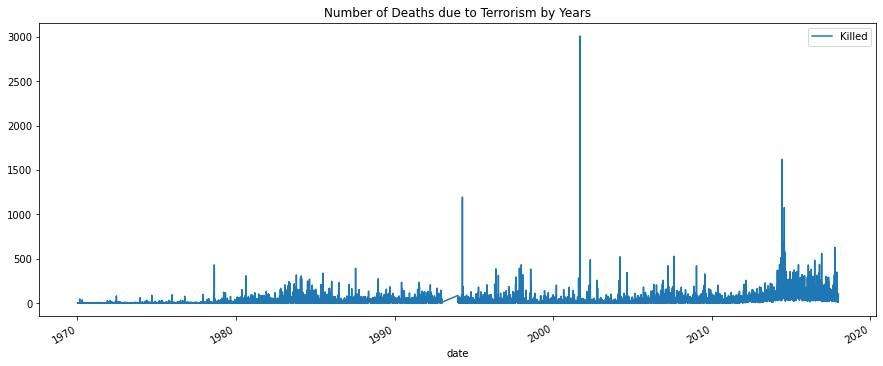

In [41]:
k_by_year.plot(figsize=(15, 6))
plt.title("Number of Deaths due to Terrorism by Years")
plt.show()

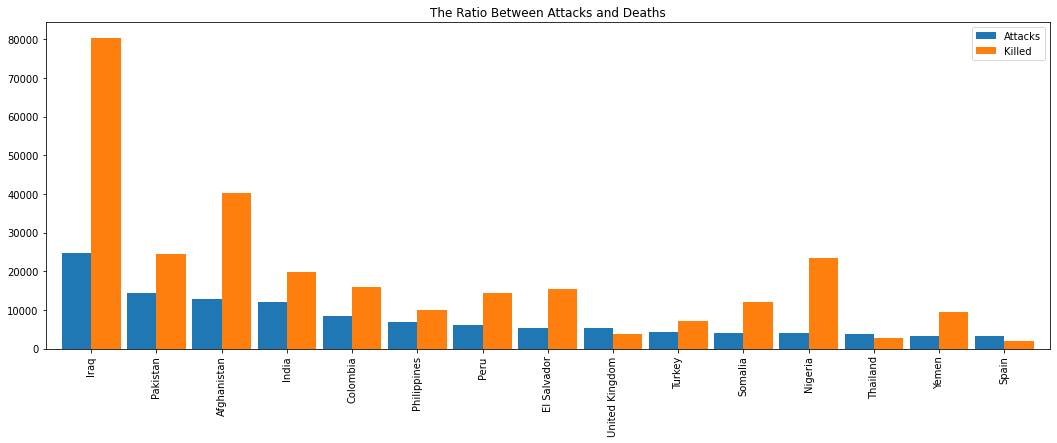

In [42]:
# The Ratio Between Attacks and Deaths
coun_terror=terror['Country'].value_counts()[:15].to_frame()
coun_terror.columns=['Attacks']
coun_kill=terror.groupby('Country')['Killed'].sum().to_frame()
coun_terror.merge(coun_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
plt.title("The Ratio Between Attacks and Deaths")
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

# Total Deaths by Regions (Hotspots)




In [46]:
general_sum = terror.groupby(by='Region').sum()
a7 = general_sum['Killed']
a7.columns = ['sum']
a7 = a7.reset_index()
a7 

,Region,Killed
0,Australasia & Oceania,164.420721
1,Central America & Caribbean,34288.818998
2,Central Asia,1009.613814
3,East Asia,1245.734686
4,Eastern Europe,7813.973279
5,Middle East & North Africa,143102.646324
6,North America,5139.521174
7,South America,32866.574231
8,South Asia,103571.035918
9,Southeast Asia,16300.353163


In [47]:
# we can see that Middle east and North afrcica are one of the regions most affected by terorism leading to deaths

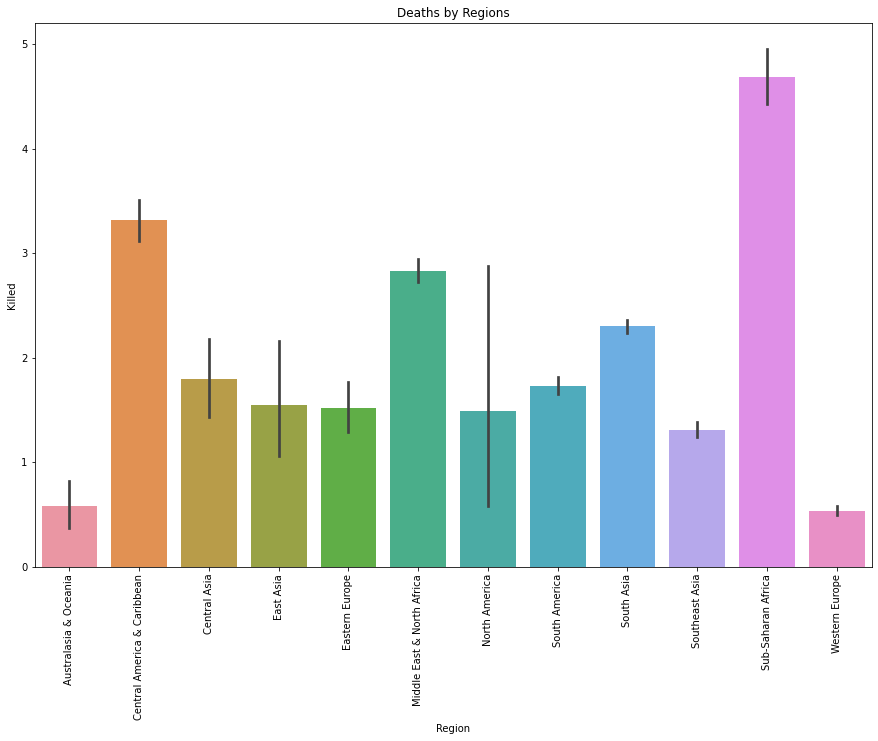

In [44]:
plt.figure(figsize=(15,10))
sns.barplot(x = 'Region', y = 'Killed', data = terror)
plt.xticks(rotation = 90)
plt.title('Deaths by Regions')
plt.show()

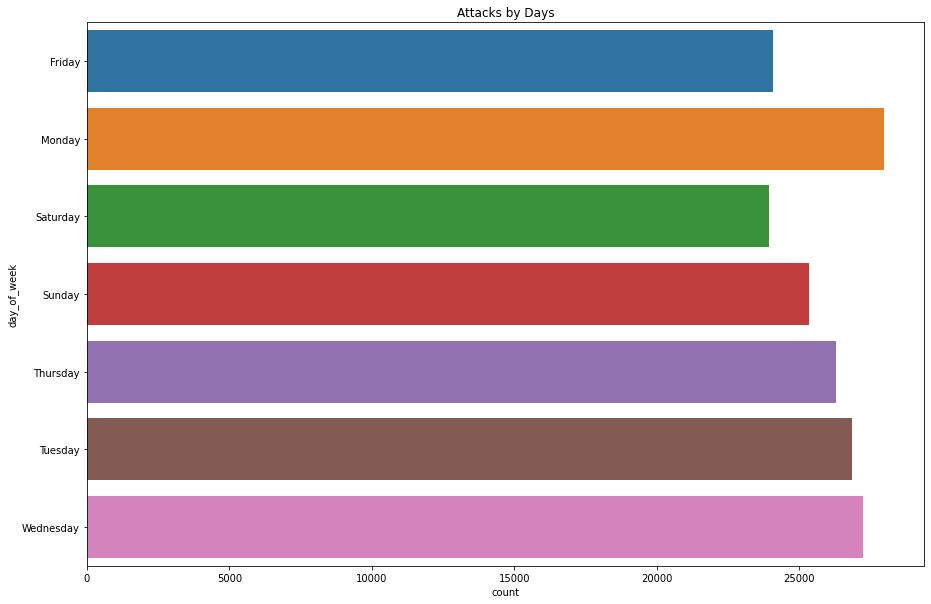

In [50]:
# days on which attack hapened
a1 = terror.groupby(by='day_of_week').agg(['count'])
a2 = a1['Region']
a2.columns = ['count']
a2 = a2.reset_index()


plt.figure(figsize=(15,10))
sns.barplot(y = 'day_of_week', x = 'count', data = a2)
plt.title("Attacks by Days")
plt.show()

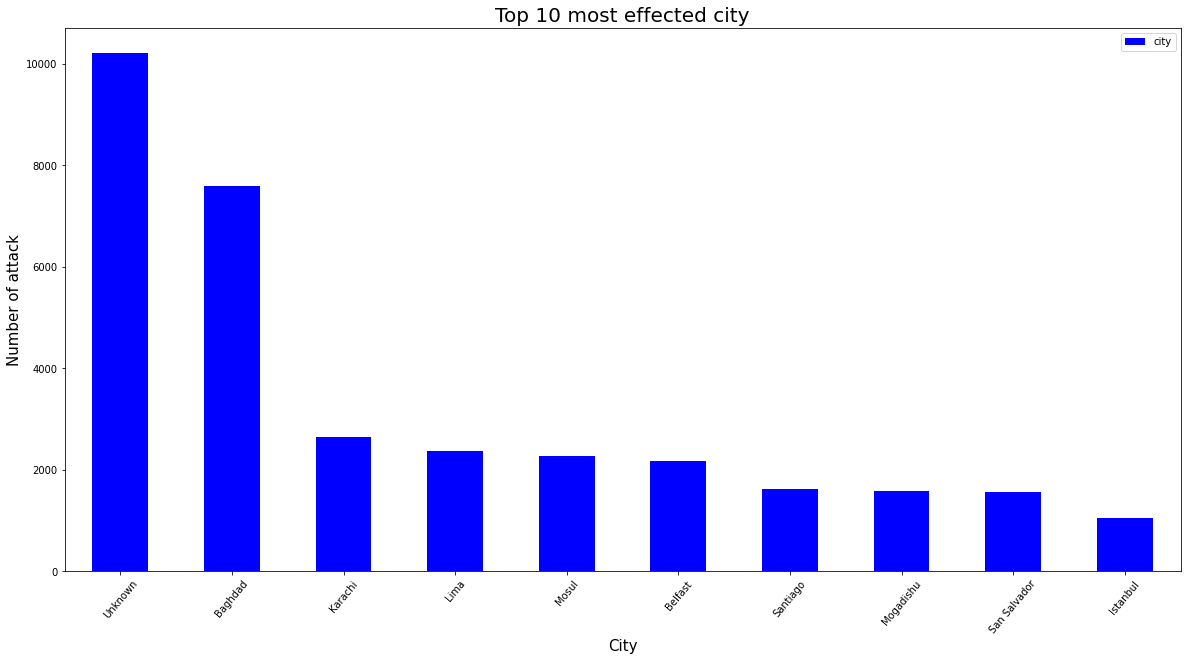

In [55]:
terror['city'].value_counts().to_frame().sort_values('city',axis=0,ascending=False).head(10).plot(kind='bar',figsize=(20,10),color='blue')
plt.xticks(rotation = 50)
plt.xlabel("City",fontsize=15)
plt.ylabel("Number of attack",fontsize=15)
plt.title("Top 10 most effected city",fontsize=20)
plt.show()

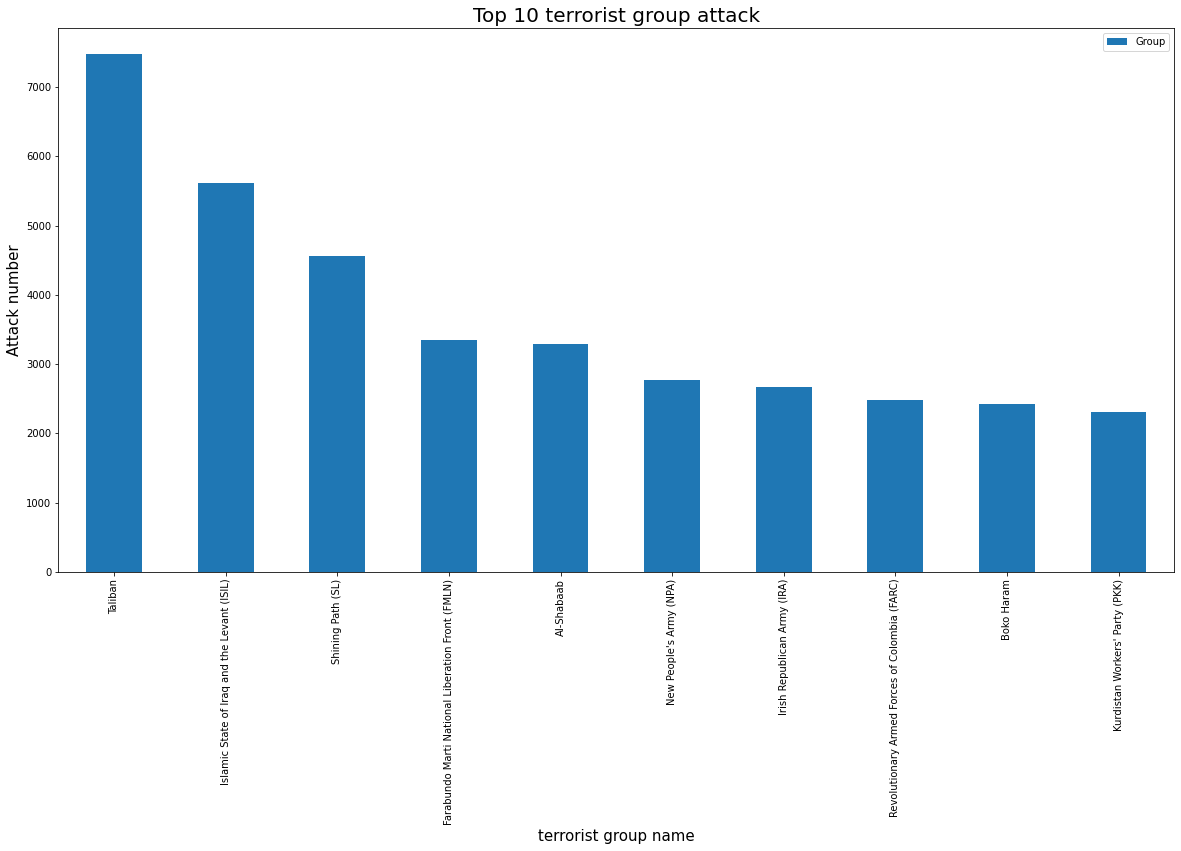

In [58]:
terror['Group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',figsize=(20,10))
plt.title("Top 10 terrorist group attack",fontsize=20)
plt.xlabel("terrorist group name",fontsize=15)
plt.ylabel("Attack number",fontsize=15)
plt.show()

# Conclusion

<ul>
<li> Group with most attacks: Talibam
<li>Region with most attacks: Sub-Saharan Africa
<li>Day on which most attacks happened: Monday
<li>Country with the most attacks: Iraq
<li>City with the most attacks: Baghdad